In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
train_loss = np.load('plots/training_loss_reg_new.npy')
val_loss = np.load('plots/validation_loss_reg_new.npy')

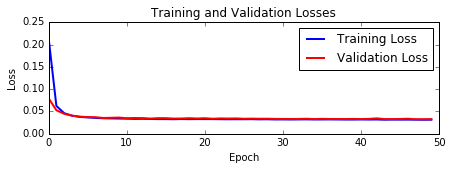

In [96]:
plt.figure(figsize=(7,2))
plt.plot(train_loss, color='b', label='Training Loss', linewidth=2)
plt.plot(val_loss, color='r', label='Validation Loss', linewidth=2)
plt.title("Training and Validation Losses")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
#plt.xlim([min(test_loss_per_sample), max(test_loss_per_sample)])
plt.show()

In [76]:
train_loss

array([ 0.21511945,  0.06243322,  0.04612087,  0.04066185,  0.0378547 ,
        0.03666968,  0.03561643,  0.03482223,  0.03441305,  0.0342018 ,
        0.03389758,  0.03344683,  0.03363563,  0.03329277,  0.03292909,
        0.03289964,  0.03261939,  0.03304569,  0.03276223,  0.03296734,
        0.0329101 ,  0.03286614,  0.03265462,  0.03253369,  0.03260722,
        0.03259723,  0.03273746,  0.03237348,  0.03252837,  0.03212132,
        0.03219759,  0.03203705,  0.03219357,  0.03232518,  0.03206464,
        0.03213475,  0.03221218,  0.0320764 ,  0.03190934,  0.03189729,
        0.03209873,  0.0319273 ,  0.0320435 ,  0.03157318,  0.03181728,
        0.03171355,  0.03178651,  0.03160942,  0.03142478,  0.03156804])

In [97]:
test_loss_per_sample = np.load('plots/test_loss_per_sample_20000_12000_reg.npy')

In [98]:
np.mean(test_loss_per_sample)

0.029742082926360044

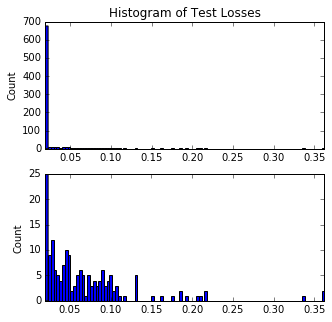

In [50]:
plt.figure(figsize=(5,5))
plt.subplot(211)
plt.hist(test_loss_per_sample, bins=100)
plt.title("Histogram of Test Losses")
#plt.xlabel("Loss")
plt.ylabel("Count")
plt.xlim([min(test_loss_per_sample), max(test_loss_per_sample)])
#plt.show()

plt.subplot(212)
threshold=0.02
temp_res = test_loss_per_sample[np.where(test_loss_per_sample>=threshold)[0]]
#plt.figure(figsize=(20,5))
plt.hist(temp_res, bins=100)
#plt.title("Histogram of Test Loss")
#plt.xlabel("Loss")
plt.ylabel("Count")
plt.xlim([threshold, max(test_loss_per_sample)])
plt.show()

In [23]:
x_train = np.load('data/temporal_train_mat.npy_20000_12000.npy')
num_samples_train, num_rows_train, num_cols_train = x_train.shape
x_train = x_train.reshape(num_samples_train, num_rows_train*num_cols_train).astype('float32') 
real_train = x_train.reshape((num_samples_train, num_rows_train, num_cols_train))
print(real_train.shape)

x_test = np.load('data/temporal_test_mat.npy_20000_12000.npy')
num_samples_test, num_rows_test, num_cols_test = x_test.shape
x_test = x_test.reshape(num_samples_test, num_rows_test*num_cols_test).astype('float32') 
real = x_test.reshape((num_samples_test, num_rows_test, num_cols_test))
print(real.shape)

real_ids = np.load('data/temporal_test_ids.npy_20000_12000.npy')
print(real_ids.shape)

predictions = np.load('plots/predictions_20000_12000_reg.npy')
predictions = predictions.reshape((num_samples_test, num_rows_test, num_cols_test))
print(predictions.shape)

(4884, 6, 10000)
(825, 6, 10000)
(1245,)
(825, 6, 10000)


In [25]:
above_threshold_indices = np.where(test_loss_per_sample>=threshold)[0]
above_threshold_indices

array([  1,   4,   8,  14,  20,  22,  24,  28,  32,  34,  38,  42,  46,
        48,  56,  57,  58,  59,  60,  63,  66,  68,  78,  81,  85,  92,
       109, 110, 114, 116, 131, 140, 143, 147, 153, 159, 166, 168, 171,
       173, 182, 186, 191, 195, 197, 202, 208, 212, 219, 222, 228, 242,
       244, 250, 255, 262, 263, 266, 267, 272, 283, 285, 290, 294, 296,
       297, 301, 302, 304, 322, 323, 327, 344, 347, 353, 359, 360, 364,
       365, 370, 382, 383, 386, 396, 404, 410, 415, 422, 423, 424, 425,
       429, 436, 450, 451, 456, 468, 487, 489, 497, 508, 509, 510, 517,
       524, 532, 535, 536, 537, 551, 559, 560, 563, 564, 569, 572, 573,
       576, 579, 584, 586, 590, 605, 606, 607, 608, 609, 615, 623, 625,
       635, 641, 642, 646, 647, 649, 650, 651, 657, 658, 661, 662, 664,
       665, 670, 689, 690, 694, 708, 714, 720, 729, 733, 736, 739, 753,
       755, 764, 784, 787, 793, 796, 797, 808, 809, 813, 815, 816, 818,
       820, 823])

In [28]:
np.max(test_loss_per_sample)

0.36218801140785217

In [30]:
np.argmax(test_loss_per_sample)

66

In [32]:
most_error_idc = np.argsort(test_loss_per_sample)[::-1]
most_error_idc 

array([ 66, 816, 202, 159, 573,  32, 244, 615, 168, 410, 820,  57, 753,
       646,  20, 228, 353, 302, 736, 344, 809, 272,  56,  28, 182, 283,
       579, 796,  59, 294, 564, 823, 266, 219, 647, 784, 551, 263, 424,
        63, 468, 143, 733, 436, 764, 497, 714, 242, 147, 296,   8, 572,
       109, 153,  46, 739, 347, 508, 537, 173, 813, 694, 635, 559, 608,
        24, 250, 720, 450, 222,   4, 422, 535, 365, 304, 489, 569, 262,
       670, 787,  68, 364, 383, 650, 729, 641, 327, 322,  22, 323, 370,
       797,  85, 297,  81, 456, 267, 425, 664, 815, 197, 605, 208, 110,
       590, 404, 186,  60, 290, 536, 658, 517, 487, 382,  78, 429, 665,
       689, 560, 563, 818,  34, 524, 415, 195, 396,  48, 576, 793, 808,
       657, 607, 651, 584, 623, 255, 662, 360,  14, 131, 191, 212,   1,
        92, 625, 451, 301,  42,  58, 171, 510, 755, 116,  38, 140, 386,
       642, 661, 359, 649, 586, 114, 166, 606, 509, 423, 285, 609, 708,
       532, 690,  77,  84, 594, 439, 704, 178, 630, 457, 511, 68


Sample:  66


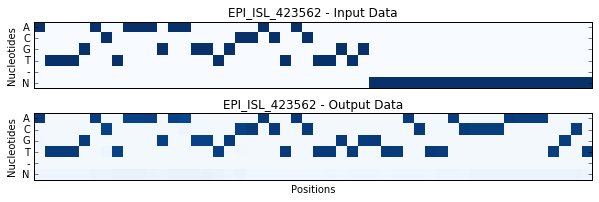

	Number of mismatches >= 0.5: 	 3277
	Mismatch positions in genome: 	 [2639, 2730, 2731, 2732, 2733, 2734, 2735, 2736, 2737, 2738, 2739, 2740, 2741, 2742, 2743, 2744, 2745, 2746, 2747, 2748, 2749, 2750, 2751, 2752, 2753, 2754, 2755, 2756, 2757, 2758, 2759, 2760, 2761, 2762, 2763, 2764, 2765, 2766, 2767, 2768, 2769, 2770, 2771, 2772, 2773, 2774, 2775, 2776, 2777, 2778, 2779, 2780, 2781, 2782, 2783, 2784, 2785, 2786, 2787, 2788, 2789, 2790, 2791, 2792, 2793, 2794, 2795, 2796, 2797, 2798, 2799, 2800, 2801, 2802, 2803, 2804, 2805, 2806, 2807, 2808, 2809, 2810, 2811, 2812, 2813, 2814, 2815, 2816, 2817, 2818, 2819, 2820, 2821, 2822, 2823, 2824, 2825, 2826, 2827, 2828, 2829, 2830, 2831, 2832, 2833, 2834, 2835, 2836, 2837, 2838, 2839, 2840, 2841, 2842, 2843, 2844, 2845, 2846, 2847, 2848, 2849, 2850, 2851, 2852, 2853, 2854, 2855, 2856, 2857, 2858, 2859, 2860, 2861, 2862, 2863, 2864, 2865, 2866, 2867, 2868, 2869, 2870, 2871, 2872, 2873, 2874, 2875, 2876, 2877, 2878, 2879, 2880, 2881, 2882, 2883,

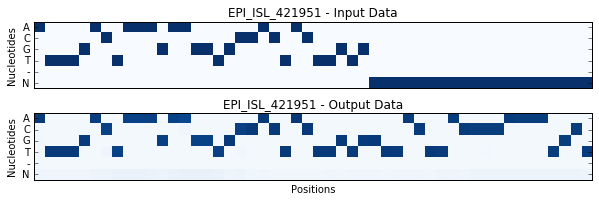

	Number of mismatches >= 0.5: 	 3265
	Mismatch positions in genome: 	 [2438, 2730, 2731, 2732, 2733, 2734, 2735, 2736, 2737, 2738, 2739, 2740, 2741, 2742, 2743, 2744, 2745, 2746, 2747, 2748, 2749, 2750, 2751, 2752, 2753, 2754, 2755, 2756, 2757, 2758, 2759, 2760, 2761, 2762, 2763, 2764, 2765, 2766, 2767, 2768, 2769, 2770, 2771, 2772, 2773, 2774, 2775, 2776, 2777, 2778, 2779, 2780, 2781, 2782, 2783, 2784, 2785, 2786, 2787, 2788, 2789, 2790, 2791, 2792, 2793, 2794, 2795, 2796, 2797, 2798, 2799, 2800, 2801, 2802, 2803, 2804, 2805, 2806, 2807, 2808, 2809, 2810, 2811, 2812, 2813, 2814, 2815, 2816, 2817, 2818, 2819, 2820, 2821, 2822, 2823, 2824, 2825, 2826, 2827, 2828, 2829, 2830, 2831, 2832, 2833, 2834, 2835, 2836, 2837, 2838, 2839, 2840, 2841, 2842, 2843, 2844, 2845, 2846, 2847, 2848, 2849, 2850, 2851, 2852, 2853, 2854, 2855, 2856, 2857, 2858, 2859, 2860, 2861, 2862, 2863, 2864, 2865, 2866, 2867, 2868, 2869, 2870, 2871, 2872, 2873, 2874, 2875, 2876, 2877, 2878, 2879, 2880, 2881, 2882, 2883,

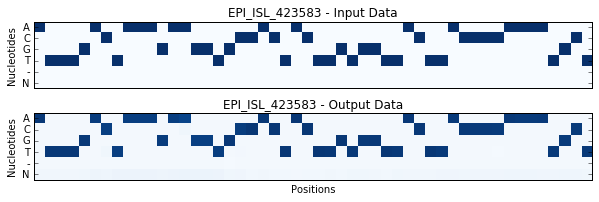

	Number of mismatches >= 0.5: 	 2881
	Mismatch positions in genome: 	 [3381, 3382, 3383, 3384, 3385, 3386, 3387, 3388, 3389, 3390, 3391, 3392, 3393, 3394, 3395, 3396, 3397, 3398, 3399, 3400, 3401, 3402, 3403, 3404, 3405, 3406, 3407, 3408, 3409, 3410, 3411, 3412, 3413, 3414, 3415, 3416, 3417, 3418, 3419, 3420, 3421, 3422, 3423, 3424, 3425, 3426, 3427, 3428, 3429, 3430, 3431, 3432, 3433, 3434, 3435, 3436, 3437, 3438, 3439, 3440, 3441, 3442, 3443, 3444, 3445, 3446, 3447, 3448, 3449, 3450, 3451, 3452, 3453, 3454, 3455, 3456, 3457, 3458, 3459, 3460, 3461, 3462, 3463, 3464, 3465, 3466, 3467, 3468, 3469, 3470, 3471, 3472, 3473, 3474, 3475, 3476, 3477, 3478, 3479, 3480, 3481, 3482, 3483, 3484, 3485, 3486, 3487, 3488, 3489, 3490, 3491, 3492, 3493, 3494, 3495, 3496, 3497, 3498, 3499, 3500, 3501, 3502, 3503, 3504, 3505, 3506, 3507, 3508, 3509, 3510, 3511, 3512, 3513, 3514, 3515, 3516, 3517, 3518, 3519, 3520, 3521, 3522, 3523, 3524, 3525, 3526, 3527, 3528, 3529, 3530, 3531, 3532, 3533, 3534, 3535,

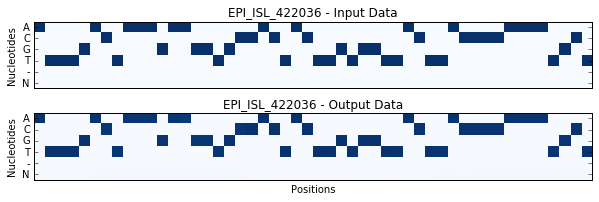

	Number of mismatches >= 0.5: 	 1451
	Mismatch positions in genome: 	 [2832, 3381, 3382, 3383, 3384, 3385, 3386, 3387, 3388, 3389, 3390, 3391, 3392, 3393, 3394, 3395, 3396, 3397, 3398, 3399, 3400, 3401, 3402, 3403, 3404, 3405, 3406, 3407, 3408, 3409, 3410, 3411, 3412, 3413, 3414, 3415, 3416, 3417, 3418, 3419, 3420, 3421, 3422, 3423, 3424, 3425, 3426, 3427, 3428, 3429, 3430, 3431, 3432, 3433, 3434, 3435, 3436, 3437, 3438, 3439, 3440, 3441, 3442, 3443, 3444, 3445, 3446, 3447, 3448, 3449, 3450, 3451, 3452, 3453, 3454, 3455, 3456, 3457, 3458, 3459, 3460, 3461, 3462, 3463, 3464, 3465, 3466, 3467, 3468, 3469, 3470, 3471, 3472, 3473, 3474, 3475, 3476, 3477, 3478, 3479, 3480, 3481, 3482, 3483, 3484, 3485, 3486, 3487, 3488, 3489, 3490, 3491, 3492, 3493, 3494, 3495, 3496, 3497, 3498, 3499, 3500, 3501, 3502, 3503, 3504, 3505, 3506, 3507, 3508, 3509, 3510, 3511, 3512, 3513, 3514, 3515, 3516, 3517, 3518, 3519, 3520, 3521, 3522, 3523, 3524, 3525, 3526, 3527, 3528, 3529, 3530, 3531, 3532, 3533, 3534,

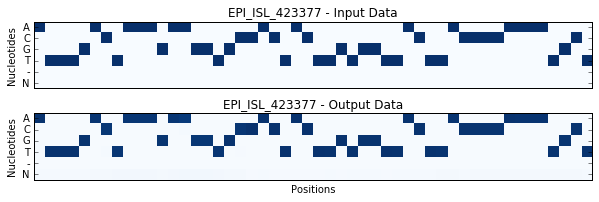

	Number of mismatches >= 0.5: 	 1449
	Mismatch positions in genome: 	 [3292, 3293, 3294, 3295, 3296, 3297, 3298, 3299, 3300, 3301, 3302, 3303, 3304, 3305, 3306, 3307, 3308, 3309, 3310, 3311, 3312, 3313, 3314, 3315, 3316, 3317, 3318, 3319, 3320, 3321, 3322, 3323, 3324, 3325, 3326, 3327, 3328, 3329, 3330, 3331, 3332, 3333, 3334, 3335, 3336, 3337, 3338, 3339, 3340, 3341, 3342, 3343, 3344, 3345, 3346, 3347, 3348, 3349, 3350, 3351, 3352, 3353, 3354, 3355, 3356, 3357, 3358, 3359, 3360, 3361, 3362, 3363, 3364, 3365, 3366, 3367, 3368, 3369, 3370, 3371, 3372, 3373, 3374, 3375, 3376, 3377, 3378, 3379, 3380, 3381, 3382, 3383, 3384, 3385, 3386, 3387, 3388, 3389, 3390, 3391, 3392, 3393, 3394, 3395, 3396, 3397, 3398, 3399, 3400, 3401, 3402, 3403, 3404, 3405, 3406, 3407, 3408, 3409, 3410, 3411, 3412, 3413, 3414, 3415, 3416, 3417, 3418, 3419, 3420, 3421, 3422, 3423, 3424, 3425, 3426, 3427, 3428, 3429, 3430, 3431, 3432, 3433, 3434, 3435, 3436, 3437, 3438, 3439, 3440, 3441, 3442, 3443, 3444, 3445, 3446,

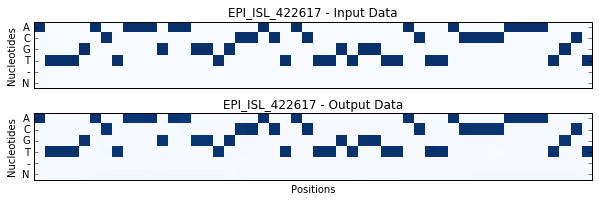

	Number of mismatches >= 0.5: 	 1243
	Mismatch positions in genome: 	 [4203, 4204, 4205, 4206, 4207, 4208, 4209, 4210, 4211, 4212, 4213, 4214, 4215, 4216, 4217, 4218, 4219, 4220, 4221, 4222, 4223, 4224, 4225, 4226, 4227, 4228, 4229, 4230, 4231, 4232, 4233, 4234, 4235, 4236, 4237, 4238, 4239, 4240, 4241, 4242, 4243, 4244, 4245, 4246, 4247, 4248, 4249, 4250, 4251, 4252, 4253, 4254, 4255, 4256, 4257, 4258, 4259, 4260, 4261, 4262, 4263, 4264, 4265, 4266, 4267, 4268, 4269, 4270, 4271, 4272, 4273, 4274, 4275, 4276, 4277, 4278, 4279, 4280, 4281, 4282, 4283, 4284, 4285, 4286, 4287, 4288, 4289, 4290, 4416, 4417, 4418, 4419, 4420, 4421, 4422, 4423, 4424, 4425, 4426, 4427, 4428, 4429, 4430, 4431, 4432, 4433, 4434, 4435, 4436, 4437, 4438, 4439, 4440, 4441, 4442, 4443, 4444, 4445, 4446, 4447, 4448, 4449, 4450, 4451, 4452, 4453, 4454, 4455, 4456, 4457, 4458, 4459, 4460, 4461, 4462, 4463, 4464, 4465, 4466, 4467, 4468, 4469, 4470, 4471, 4472, 4473, 4474, 4475, 4476, 4477, 4478, 4479, 4480, 4481, 4482,

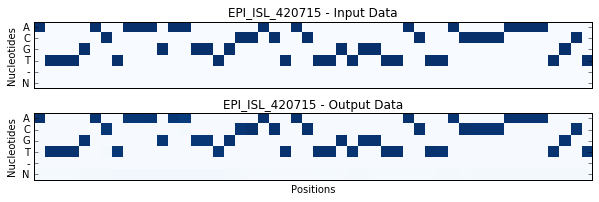

	Number of mismatches >= 0.5: 	 1413
	Mismatch positions in genome: 	 [3292, 3293, 3294, 3295, 3296, 3297, 3298, 3299, 3300, 3301, 3302, 3303, 3304, 3305, 3306, 3307, 3308, 3309, 3310, 3311, 3312, 3313, 3314, 3315, 3316, 3317, 3318, 3319, 3320, 3321, 3322, 3323, 3324, 3325, 3326, 3327, 3328, 3329, 3330, 3331, 3332, 3333, 3334, 3335, 3336, 3337, 3338, 3339, 3340, 3341, 3342, 3343, 3344, 3345, 3346, 3347, 3348, 3349, 3350, 3351, 3352, 3353, 3354, 3355, 3356, 3357, 3358, 3359, 3360, 3361, 3362, 3363, 3364, 3365, 3366, 3367, 3368, 3369, 3370, 3371, 3372, 3373, 3374, 3375, 3376, 3377, 3378, 3379, 3380, 3381, 3382, 3383, 3384, 3385, 3386, 3387, 3388, 3389, 3390, 3391, 3392, 3393, 3394, 3395, 3396, 3397, 3398, 3399, 3400, 3401, 3402, 3403, 3404, 3405, 3406, 3407, 3408, 3409, 3410, 3411, 3412, 3413, 3414, 3415, 3416, 3417, 3418, 3419, 3420, 3421, 3422, 3423, 3424, 3425, 3426, 3427, 3428, 3429, 3430, 3431, 3432, 3433, 3434, 3435, 3436, 3437, 3438, 3439, 3440, 3441, 3442, 3443, 3444, 3445, 3446,

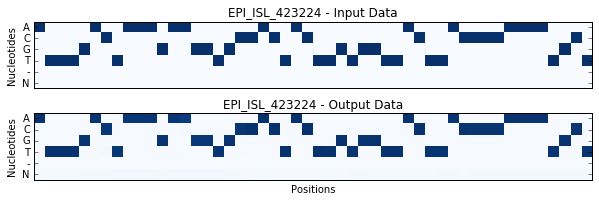

	Number of mismatches >= 0.5: 	 1327
	Mismatch positions in genome: 	 [3292, 3293, 3294, 3295, 3296, 3297, 3298, 3299, 3300, 3301, 3302, 3303, 3304, 3305, 3306, 3307, 3308, 3309, 3310, 3311, 3312, 3313, 3314, 3315, 3316, 3317, 3318, 3319, 3320, 3321, 3322, 3323, 3324, 3325, 3326, 3327, 3328, 3329, 3330, 3331, 3332, 3333, 3334, 3335, 3336, 3337, 3338, 3339, 3340, 3341, 3342, 3343, 3344, 3345, 3346, 3347, 3348, 3349, 3350, 3351, 3352, 3353, 3354, 3355, 3356, 3357, 3358, 3359, 3360, 3361, 3362, 3363, 3364, 3365, 3366, 3367, 3368, 3369, 3370, 3371, 3372, 3373, 3374, 3375, 3376, 3377, 3378, 3379, 3380, 3381, 3382, 3383, 3384, 3385, 3386, 3387, 3388, 3389, 3390, 3391, 3392, 3393, 3394, 3395, 3396, 3397, 3398, 3399, 3400, 3401, 3402, 3403, 3404, 3405, 3406, 3407, 3408, 3409, 3410, 3411, 3412, 3413, 3414, 3415, 3416, 3417, 3418, 3419, 3420, 3421, 3422, 3423, 3424, 3425, 3426, 3427, 3428, 3429, 3430, 3431, 3432, 3433, 3434, 3435, 3436, 3437, 3438, 3439, 3440, 3441, 3442, 3443, 3444, 3445, 3446,

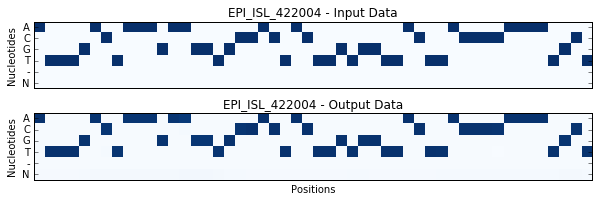

	Number of mismatches >= 0.5: 	 1134
	Mismatch positions in genome: 	 [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2279, 2280, 2281, 2282, 2283, 2284, 2285, 2286, 2287, 2288, 2289, 2290, 2291, 2292, 2293, 2294, 2295, 2296, 2297, 2298, 2299, 2300, 2301, 2302, 2303, 2304, 2305, 2306, 2307, 2308, 2309, 2310, 2311, 2312, 2313, 2314, 2315, 2316, 2317, 2318, 2319, 2320, 2321, 2322, 2323, 2324, 2325, 2326, 2327, 2328, 2329, 2330, 2331, 2332, 2333, 2334, 2335, 2336, 2337, 2338, 2339, 2340, 2341, 2342, 2343, 2344, 2345, 2346, 2347, 2348, 2349, 2350, 2351, 2352, 2353, 2354, 2355, 2356, 2357, 2358, 2359, 2360, 2361, 2362, 2363, 2364, 2365, 2366, 2367, 2368, 2369, 2370, 2371, 2372, 2373, 2374, 2375, 2376, 2377, 2378, 2379, 2380, 2381, 2382, 2383, 2384, 2385, 2386, 2387, 2388, 2389, 2390, 2391, 2392, 2393, 2394, 2395, 2396, 2397, 2398, 2399, 2400, 2401, 2402, 2403, 2404, 2405, 2406, 2407, 2408, 2409, 2410, 2411, 2412, 2413, 2414, 2415,

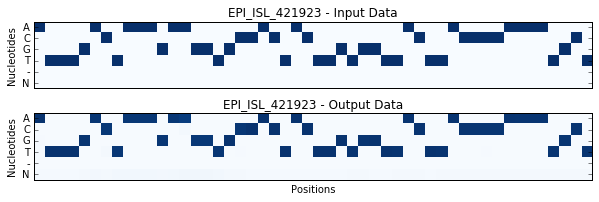

	Number of mismatches >= 0.5: 	 1394
	Mismatch positions in genome: 	 [2411, 2412, 2413, 2414, 2415, 2416, 2417, 2418, 2419, 2420, 2421, 2422, 2423, 2424, 2425, 2426, 2427, 2428, 2429, 2430, 2431, 2432, 2433, 2434, 2435, 2436, 2437, 2438, 2440, 2441, 2442, 2443, 2444, 2445, 2446, 2447, 2448, 2449, 2450, 2451, 2452, 2453, 2454, 2455, 2456, 2457, 2458, 2459, 2460, 2461, 2462, 2463, 2464, 2465, 2466, 2467, 2468, 2469, 2470, 2471, 2472, 2473, 2474, 2475, 2476, 2477, 2478, 2479, 2480, 2481, 2482, 2483, 2484, 2485, 2486, 2487, 2488, 2489, 2490, 2491, 2492, 2493, 2494, 2495, 2496, 2497, 2498, 2499, 2500, 2501, 2502, 2503, 2504, 2505, 2506, 2507, 2508, 2509, 2510, 2511, 2512, 2513, 2514, 2515, 2516, 2517, 2518, 2519, 2520, 2521, 2522, 2523, 2524, 2525, 2526, 2527, 2528, 2529, 2530, 2531, 2532, 2533, 2534, 2535, 2536, 2537, 2538, 2539, 2540, 2541, 2542, 2543, 2544, 2545, 2546, 2547, 2548, 2549, 2550, 2551, 2552, 2553, 2554, 2555, 2556, 2557, 2558, 2559, 2560, 2561, 2562, 2563, 2564, 2565, 2566,

In [99]:
above_threshold_indices = np.where(test_loss_per_sample>=threshold)[0]
most_error_idc = np.argsort(test_loss_per_sample)[::-1]

pos_start = 700 

y_ticks = ['A', 'C', 'G', 'T', '-', 'N']
for i in range(10):
    sample_idx = most_error_idc[i]
    print("\nSample: ", sample_idx)
    sample_real = real[sample_idx, :, :]
    sample_pred = predictions[sample_idx, :, :]
    
    plt.figure(figsize=(10,3))
    plt.subplot(211)
    plt.imshow(sample_real[:, pos_start:pos_start+50], interpolation='nearest', cmap='Blues', vmin=0, vmax=1)
    plt.xticks([], [])
    #plt.xlabel("Positions")
    plt.yticks(np.arange(len(y_ticks)), y_ticks)
    plt.ylabel("Nucleotides")
    plt.title("%s - Input Data" % (real_ids[sample_idx]))
    plt.subplot(212)
    plt.imshow(sample_pred[:, pos_start:pos_start+50], interpolation='nearest', cmap='Blues', vmin=0, vmax=1)
    plt.xticks([], [])
    plt.xlabel("Positions")
    plt.yticks(np.arange(len(y_ticks)), y_ticks)
    plt.ylabel("Nucleotides")
    plt.title("%s - Output Data" % (real_ids[sample_idx]))  
    plt.show()
    
    thresh = 0.5
    mismatch_pos = np.unique(np.where(np.abs(sample_real-sample_pred)>=thresh)[1])
    print("\tNumber of mismatches >= %s: \t %s" %(thresh, len(mismatch_pos)))
    print("\tMismatch positions in genome: \t", sorted(mismatch_pos+2000))


Sample:  66
	Number of mismatches >= 0.5: 	 3277
	Mismatch positions in genome: 	 [2639, 2730, 2731, 2732, 2733, 2734, 2735, 2736, 2737, 2738, 2739, 2740, 2741, 2742, 2743, 2744, 2745, 2746, 2747, 2748, 2749, 2750, 2751, 2752, 2753, 2754, 2755, 2756, 2757, 2758, 2759, 2760, 2761, 2762, 2763, 2764, 2765, 2766, 2767, 2768, 2769, 2770, 2771, 2772, 2773, 2774, 2775, 2776, 2777, 2778, 2779, 2780, 2781, 2782, 2783, 2784, 2785, 2786, 2787, 2788, 2789, 2790, 2791, 2792, 2793, 2794, 2795, 2796, 2797, 2798, 2799, 2800, 2801, 2802, 2803, 2804, 2805, 2806, 2807, 2808, 2809, 2810, 2811, 2812, 2813, 2814, 2815, 2816, 2817, 2818, 2819, 2820, 2821, 2822, 2823, 2824, 2825, 2826, 2827, 2828, 2829, 2830, 2831, 2832, 2833, 2834, 2835, 2836, 2837, 2838, 2839, 2840, 2841, 2842, 2843, 2844, 2845, 2846, 2847, 2848, 2849, 2850, 2851, 2852, 2853, 2854, 2855, 2856, 2857, 2858, 2859, 2860, 2861, 2862, 2863, 2864, 2865, 2866, 2867, 2868, 2869, 2870, 2871, 2872, 2873, 2874, 2875, 2876, 2877, 2878, 2879, 2880, 2881

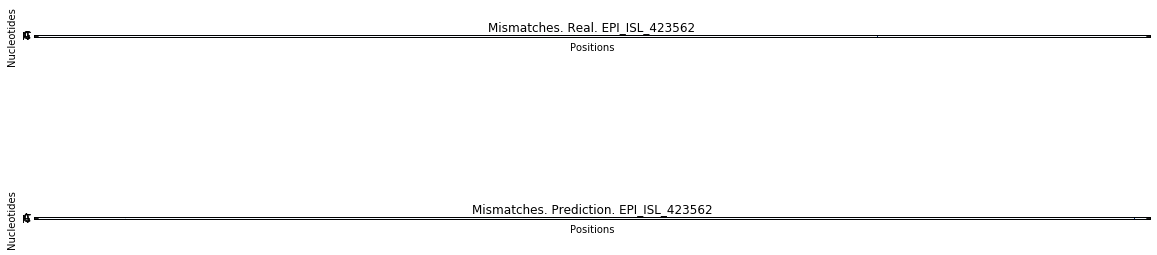


Sample:  816
	Number of mismatches >= 0.5: 	 3265
	Mismatch positions in genome: 	 [2438, 2730, 2731, 2732, 2733, 2734, 2735, 2736, 2737, 2738, 2739, 2740, 2741, 2742, 2743, 2744, 2745, 2746, 2747, 2748, 2749, 2750, 2751, 2752, 2753, 2754, 2755, 2756, 2757, 2758, 2759, 2760, 2761, 2762, 2763, 2764, 2765, 2766, 2767, 2768, 2769, 2770, 2771, 2772, 2773, 2774, 2775, 2776, 2777, 2778, 2779, 2780, 2781, 2782, 2783, 2784, 2785, 2786, 2787, 2788, 2789, 2790, 2791, 2792, 2793, 2794, 2795, 2796, 2797, 2798, 2799, 2800, 2801, 2802, 2803, 2804, 2805, 2806, 2807, 2808, 2809, 2810, 2811, 2812, 2813, 2814, 2815, 2816, 2817, 2818, 2819, 2820, 2821, 2822, 2823, 2824, 2825, 2826, 2827, 2828, 2829, 2830, 2831, 2832, 2833, 2834, 2835, 2836, 2837, 2838, 2839, 2840, 2841, 2842, 2843, 2844, 2845, 2846, 2847, 2848, 2849, 2850, 2851, 2852, 2853, 2854, 2855, 2856, 2857, 2858, 2859, 2860, 2861, 2862, 2863, 2864, 2865, 2866, 2867, 2868, 2869, 2870, 2871, 2872, 2873, 2874, 2875, 2876, 2877, 2878, 2879, 2880, 288

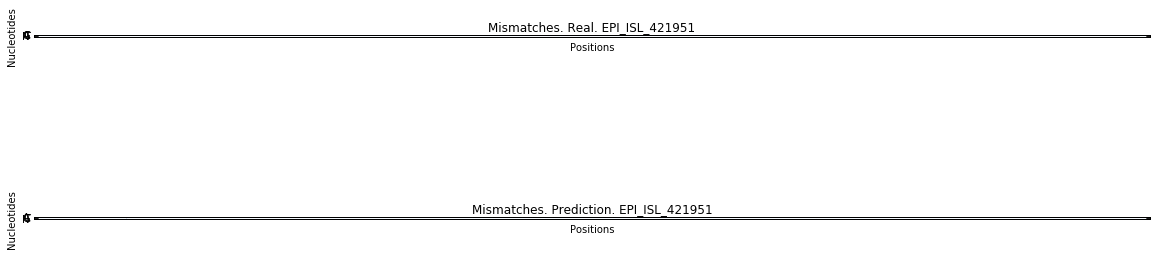


Sample:  202
	Number of mismatches >= 0.5: 	 2881
	Mismatch positions in genome: 	 [3381, 3382, 3383, 3384, 3385, 3386, 3387, 3388, 3389, 3390, 3391, 3392, 3393, 3394, 3395, 3396, 3397, 3398, 3399, 3400, 3401, 3402, 3403, 3404, 3405, 3406, 3407, 3408, 3409, 3410, 3411, 3412, 3413, 3414, 3415, 3416, 3417, 3418, 3419, 3420, 3421, 3422, 3423, 3424, 3425, 3426, 3427, 3428, 3429, 3430, 3431, 3432, 3433, 3434, 3435, 3436, 3437, 3438, 3439, 3440, 3441, 3442, 3443, 3444, 3445, 3446, 3447, 3448, 3449, 3450, 3451, 3452, 3453, 3454, 3455, 3456, 3457, 3458, 3459, 3460, 3461, 3462, 3463, 3464, 3465, 3466, 3467, 3468, 3469, 3470, 3471, 3472, 3473, 3474, 3475, 3476, 3477, 3478, 3479, 3480, 3481, 3482, 3483, 3484, 3485, 3486, 3487, 3488, 3489, 3490, 3491, 3492, 3493, 3494, 3495, 3496, 3497, 3498, 3499, 3500, 3501, 3502, 3503, 3504, 3505, 3506, 3507, 3508, 3509, 3510, 3511, 3512, 3513, 3514, 3515, 3516, 3517, 3518, 3519, 3520, 3521, 3522, 3523, 3524, 3525, 3526, 3527, 3528, 3529, 3530, 3531, 3532, 353

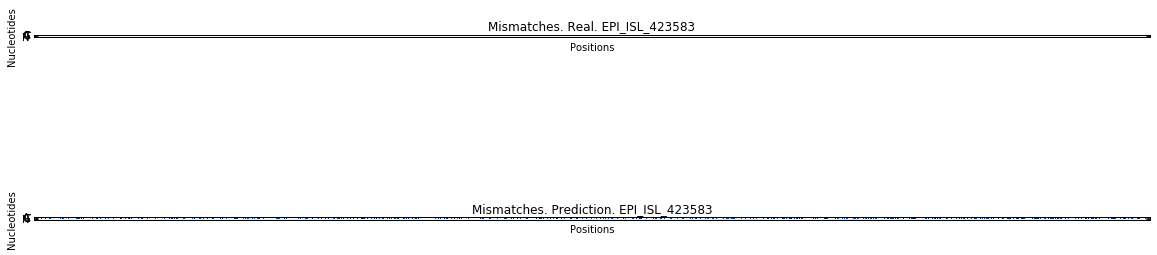


Sample:  159
	Number of mismatches >= 0.5: 	 1451
	Mismatch positions in genome: 	 [2832, 3381, 3382, 3383, 3384, 3385, 3386, 3387, 3388, 3389, 3390, 3391, 3392, 3393, 3394, 3395, 3396, 3397, 3398, 3399, 3400, 3401, 3402, 3403, 3404, 3405, 3406, 3407, 3408, 3409, 3410, 3411, 3412, 3413, 3414, 3415, 3416, 3417, 3418, 3419, 3420, 3421, 3422, 3423, 3424, 3425, 3426, 3427, 3428, 3429, 3430, 3431, 3432, 3433, 3434, 3435, 3436, 3437, 3438, 3439, 3440, 3441, 3442, 3443, 3444, 3445, 3446, 3447, 3448, 3449, 3450, 3451, 3452, 3453, 3454, 3455, 3456, 3457, 3458, 3459, 3460, 3461, 3462, 3463, 3464, 3465, 3466, 3467, 3468, 3469, 3470, 3471, 3472, 3473, 3474, 3475, 3476, 3477, 3478, 3479, 3480, 3481, 3482, 3483, 3484, 3485, 3486, 3487, 3488, 3489, 3490, 3491, 3492, 3493, 3494, 3495, 3496, 3497, 3498, 3499, 3500, 3501, 3502, 3503, 3504, 3505, 3506, 3507, 3508, 3509, 3510, 3511, 3512, 3513, 3514, 3515, 3516, 3517, 3518, 3519, 3520, 3521, 3522, 3523, 3524, 3525, 3526, 3527, 3528, 3529, 3530, 3531, 353

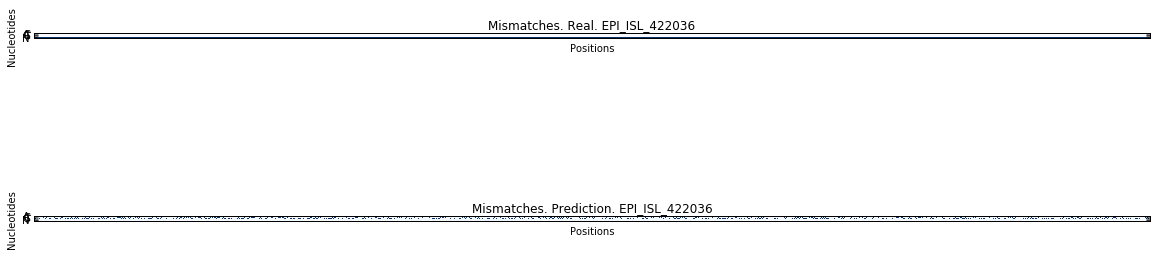


Sample:  573
	Number of mismatches >= 0.5: 	 1449
	Mismatch positions in genome: 	 [3292, 3293, 3294, 3295, 3296, 3297, 3298, 3299, 3300, 3301, 3302, 3303, 3304, 3305, 3306, 3307, 3308, 3309, 3310, 3311, 3312, 3313, 3314, 3315, 3316, 3317, 3318, 3319, 3320, 3321, 3322, 3323, 3324, 3325, 3326, 3327, 3328, 3329, 3330, 3331, 3332, 3333, 3334, 3335, 3336, 3337, 3338, 3339, 3340, 3341, 3342, 3343, 3344, 3345, 3346, 3347, 3348, 3349, 3350, 3351, 3352, 3353, 3354, 3355, 3356, 3357, 3358, 3359, 3360, 3361, 3362, 3363, 3364, 3365, 3366, 3367, 3368, 3369, 3370, 3371, 3372, 3373, 3374, 3375, 3376, 3377, 3378, 3379, 3380, 3381, 3382, 3383, 3384, 3385, 3386, 3387, 3388, 3389, 3390, 3391, 3392, 3393, 3394, 3395, 3396, 3397, 3398, 3399, 3400, 3401, 3402, 3403, 3404, 3405, 3406, 3407, 3408, 3409, 3410, 3411, 3412, 3413, 3414, 3415, 3416, 3417, 3418, 3419, 3420, 3421, 3422, 3423, 3424, 3425, 3426, 3427, 3428, 3429, 3430, 3431, 3432, 3433, 3434, 3435, 3436, 3437, 3438, 3439, 3440, 3441, 3442, 3443, 344

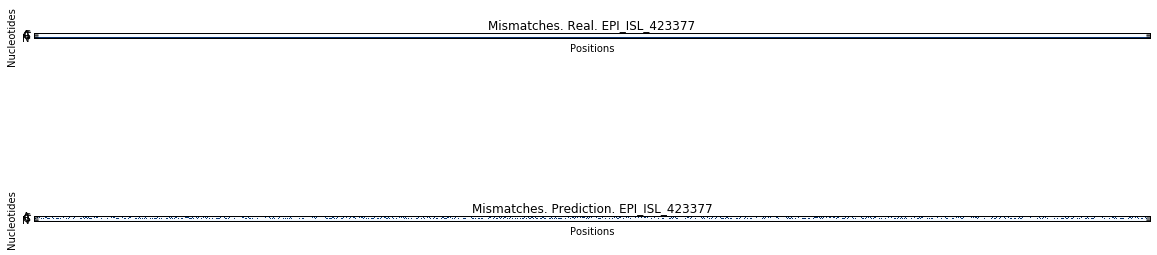


Sample:  32
	Number of mismatches >= 0.5: 	 1243
	Mismatch positions in genome: 	 [4203, 4204, 4205, 4206, 4207, 4208, 4209, 4210, 4211, 4212, 4213, 4214, 4215, 4216, 4217, 4218, 4219, 4220, 4221, 4222, 4223, 4224, 4225, 4226, 4227, 4228, 4229, 4230, 4231, 4232, 4233, 4234, 4235, 4236, 4237, 4238, 4239, 4240, 4241, 4242, 4243, 4244, 4245, 4246, 4247, 4248, 4249, 4250, 4251, 4252, 4253, 4254, 4255, 4256, 4257, 4258, 4259, 4260, 4261, 4262, 4263, 4264, 4265, 4266, 4267, 4268, 4269, 4270, 4271, 4272, 4273, 4274, 4275, 4276, 4277, 4278, 4279, 4280, 4281, 4282, 4283, 4284, 4285, 4286, 4287, 4288, 4289, 4290, 4416, 4417, 4418, 4419, 4420, 4421, 4422, 4423, 4424, 4425, 4426, 4427, 4428, 4429, 4430, 4431, 4432, 4433, 4434, 4435, 4436, 4437, 4438, 4439, 4440, 4441, 4442, 4443, 4444, 4445, 4446, 4447, 4448, 4449, 4450, 4451, 4452, 4453, 4454, 4455, 4456, 4457, 4458, 4459, 4460, 4461, 4462, 4463, 4464, 4465, 4466, 4467, 4468, 4469, 4470, 4471, 4472, 4473, 4474, 4475, 4476, 4477, 4478, 4479, 4480

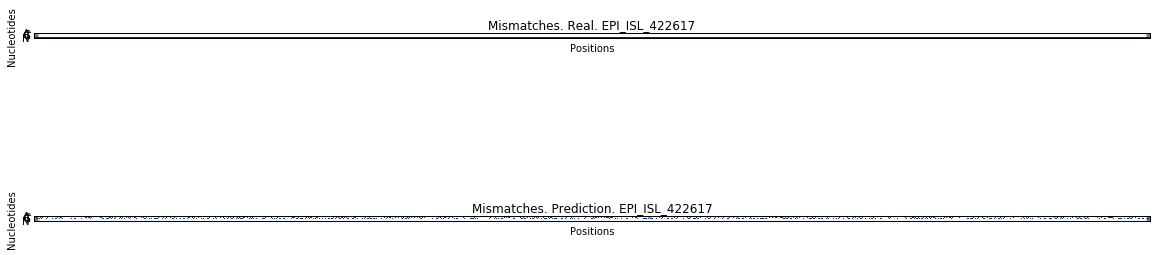


Sample:  244
	Number of mismatches >= 0.5: 	 1413
	Mismatch positions in genome: 	 [3292, 3293, 3294, 3295, 3296, 3297, 3298, 3299, 3300, 3301, 3302, 3303, 3304, 3305, 3306, 3307, 3308, 3309, 3310, 3311, 3312, 3313, 3314, 3315, 3316, 3317, 3318, 3319, 3320, 3321, 3322, 3323, 3324, 3325, 3326, 3327, 3328, 3329, 3330, 3331, 3332, 3333, 3334, 3335, 3336, 3337, 3338, 3339, 3340, 3341, 3342, 3343, 3344, 3345, 3346, 3347, 3348, 3349, 3350, 3351, 3352, 3353, 3354, 3355, 3356, 3357, 3358, 3359, 3360, 3361, 3362, 3363, 3364, 3365, 3366, 3367, 3368, 3369, 3370, 3371, 3372, 3373, 3374, 3375, 3376, 3377, 3378, 3379, 3380, 3381, 3382, 3383, 3384, 3385, 3386, 3387, 3388, 3389, 3390, 3391, 3392, 3393, 3394, 3395, 3396, 3397, 3398, 3399, 3400, 3401, 3402, 3403, 3404, 3405, 3406, 3407, 3408, 3409, 3410, 3411, 3412, 3413, 3414, 3415, 3416, 3417, 3418, 3419, 3420, 3421, 3422, 3423, 3424, 3425, 3426, 3427, 3428, 3429, 3430, 3431, 3432, 3433, 3434, 3435, 3436, 3437, 3438, 3439, 3440, 3441, 3442, 3443, 344

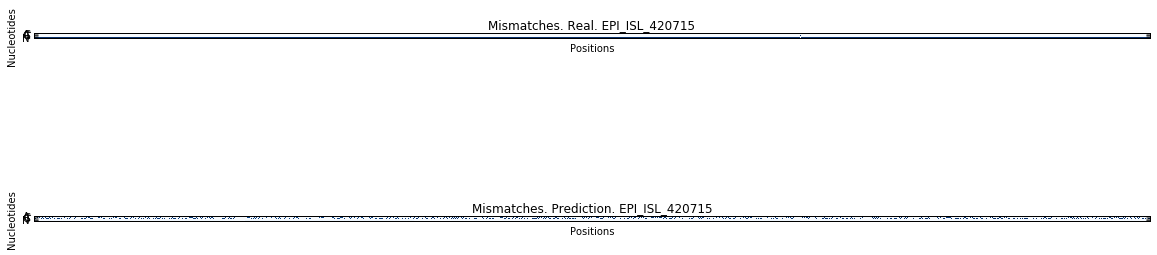


Sample:  615
	Number of mismatches >= 0.5: 	 1327
	Mismatch positions in genome: 	 [3292, 3293, 3294, 3295, 3296, 3297, 3298, 3299, 3300, 3301, 3302, 3303, 3304, 3305, 3306, 3307, 3308, 3309, 3310, 3311, 3312, 3313, 3314, 3315, 3316, 3317, 3318, 3319, 3320, 3321, 3322, 3323, 3324, 3325, 3326, 3327, 3328, 3329, 3330, 3331, 3332, 3333, 3334, 3335, 3336, 3337, 3338, 3339, 3340, 3341, 3342, 3343, 3344, 3345, 3346, 3347, 3348, 3349, 3350, 3351, 3352, 3353, 3354, 3355, 3356, 3357, 3358, 3359, 3360, 3361, 3362, 3363, 3364, 3365, 3366, 3367, 3368, 3369, 3370, 3371, 3372, 3373, 3374, 3375, 3376, 3377, 3378, 3379, 3380, 3381, 3382, 3383, 3384, 3385, 3386, 3387, 3388, 3389, 3390, 3391, 3392, 3393, 3394, 3395, 3396, 3397, 3398, 3399, 3400, 3401, 3402, 3403, 3404, 3405, 3406, 3407, 3408, 3409, 3410, 3411, 3412, 3413, 3414, 3415, 3416, 3417, 3418, 3419, 3420, 3421, 3422, 3423, 3424, 3425, 3426, 3427, 3428, 3429, 3430, 3431, 3432, 3433, 3434, 3435, 3436, 3437, 3438, 3439, 3440, 3441, 3442, 3443, 344

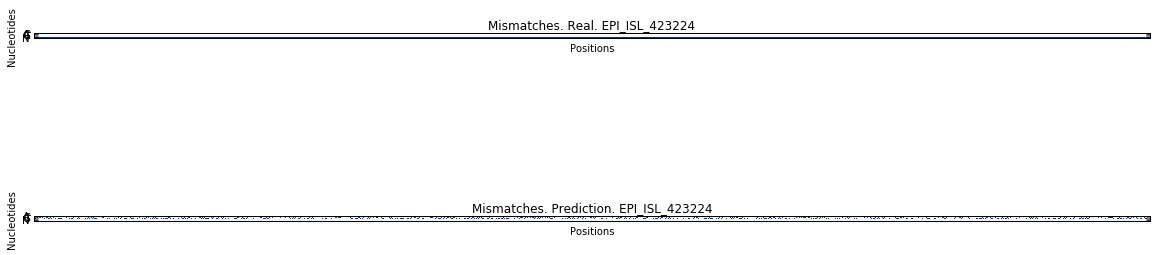


Sample:  168
	Number of mismatches >= 0.5: 	 1134
	Mismatch positions in genome: 	 [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2279, 2280, 2281, 2282, 2283, 2284, 2285, 2286, 2287, 2288, 2289, 2290, 2291, 2292, 2293, 2294, 2295, 2296, 2297, 2298, 2299, 2300, 2301, 2302, 2303, 2304, 2305, 2306, 2307, 2308, 2309, 2310, 2311, 2312, 2313, 2314, 2315, 2316, 2317, 2318, 2319, 2320, 2321, 2322, 2323, 2324, 2325, 2326, 2327, 2328, 2329, 2330, 2331, 2332, 2333, 2334, 2335, 2336, 2337, 2338, 2339, 2340, 2341, 2342, 2343, 2344, 2345, 2346, 2347, 2348, 2349, 2350, 2351, 2352, 2353, 2354, 2355, 2356, 2357, 2358, 2359, 2360, 2361, 2362, 2363, 2364, 2365, 2366, 2367, 2368, 2369, 2370, 2371, 2372, 2373, 2374, 2375, 2376, 2377, 2378, 2379, 2380, 2381, 2382, 2383, 2384, 2385, 2386, 2387, 2388, 2389, 2390, 2391, 2392, 2393, 2394, 2395, 2396, 2397, 2398, 2399, 2400, 2401, 2402, 2403, 2404, 2405, 2406, 2407, 2408, 2409, 2410, 2411, 2412, 241

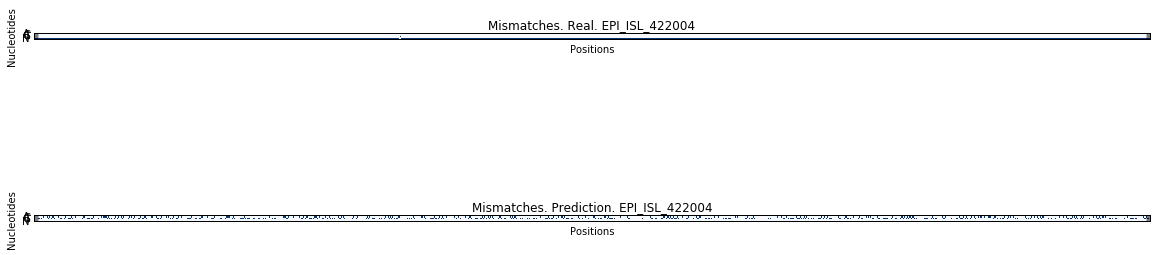


Sample:  410
	Number of mismatches >= 0.5: 	 1394
	Mismatch positions in genome: 	 [2411, 2412, 2413, 2414, 2415, 2416, 2417, 2418, 2419, 2420, 2421, 2422, 2423, 2424, 2425, 2426, 2427, 2428, 2429, 2430, 2431, 2432, 2433, 2434, 2435, 2436, 2437, 2438, 2440, 2441, 2442, 2443, 2444, 2445, 2446, 2447, 2448, 2449, 2450, 2451, 2452, 2453, 2454, 2455, 2456, 2457, 2458, 2459, 2460, 2461, 2462, 2463, 2464, 2465, 2466, 2467, 2468, 2469, 2470, 2471, 2472, 2473, 2474, 2475, 2476, 2477, 2478, 2479, 2480, 2481, 2482, 2483, 2484, 2485, 2486, 2487, 2488, 2489, 2490, 2491, 2492, 2493, 2494, 2495, 2496, 2497, 2498, 2499, 2500, 2501, 2502, 2503, 2504, 2505, 2506, 2507, 2508, 2509, 2510, 2511, 2512, 2513, 2514, 2515, 2516, 2517, 2518, 2519, 2520, 2521, 2522, 2523, 2524, 2525, 2526, 2527, 2528, 2529, 2530, 2531, 2532, 2533, 2534, 2535, 2536, 2537, 2538, 2539, 2540, 2541, 2542, 2543, 2544, 2545, 2546, 2547, 2548, 2549, 2550, 2551, 2552, 2553, 2554, 2555, 2556, 2557, 2558, 2559, 2560, 2561, 2562, 2563, 256

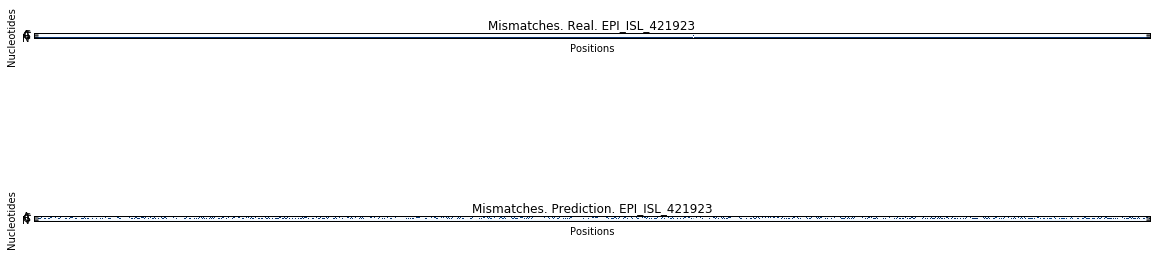

In [39]:
above_threshold_indices = np.where(test_loss_per_sample>=threshold)[0]
most_error_idc = np.argsort(test_loss_per_sample)[::-1]

pos_start = 500

y_ticks = ['A', 'C', 'G', 'T', '-', 'N']
for i in range(10):
    sample_idx = most_error_idc[i]
    print("\nSample: ", sample_idx)
    sample_real = real[sample_idx, :, :]
    sample_pred = predictions[sample_idx, :, :]
    
    thresh = 0.5
    mismatch_pos = np.unique(np.where(np.abs(sample_real-sample_pred)>=thresh)[1])
    print("\tNumber of mismatches >= %s: \t %s" %(thresh, len(mismatch_pos)))
    print("\tMismatch positions in genome: \t", sorted(mismatch_pos+2000))
    
    mismatch_sample = sample_real[:, mismatch_pos]
    mismatch_pred = sample_pred[:, mismatch_pos]
    
    print("\tAll mismatches: ")
    plt.figure(figsize=(20,6))
    plt.subplot(211)
    plt.imshow(mismatch_sample, interpolation='nearest', cmap='Blues')
    plt.xticks([], [])
    plt.xlabel("Positions")
    plt.yticks(np.arange(len(y_ticks)), y_ticks)
    plt.ylabel("Nucleotides")
    #plt.title("Mismatches. Real. Idx: %s. Name: %s" % (str(sample_idx), real_ids[sample_idx]))
    plt.title("Mismatches. Real. %s" % ( real_ids[sample_idx]))
    plt.subplot(212)
    plt.imshow(mismatch_pred, interpolation='nearest', cmap='Blues')
    plt.xticks([], [])
    plt.xlabel("Positions")
    plt.yticks(np.arange(len(y_ticks)), y_ticks)
    plt.ylabel("Nucleotides")
    #plt.title("Mismatches. Prediction. Idx: %s. Name: %s" % (str(sample_idx), real_ids[sample_idx]))  
    plt.title("Mismatches. Prediction. %s" % ( real_ids[sample_idx]))  
    plt.show()

In [138]:
marg_real_train = np.sum(real_train, axis=0)
marg_real = np.sum(real, axis=0)
marg_pred = np.sum(predictions, axis=0)

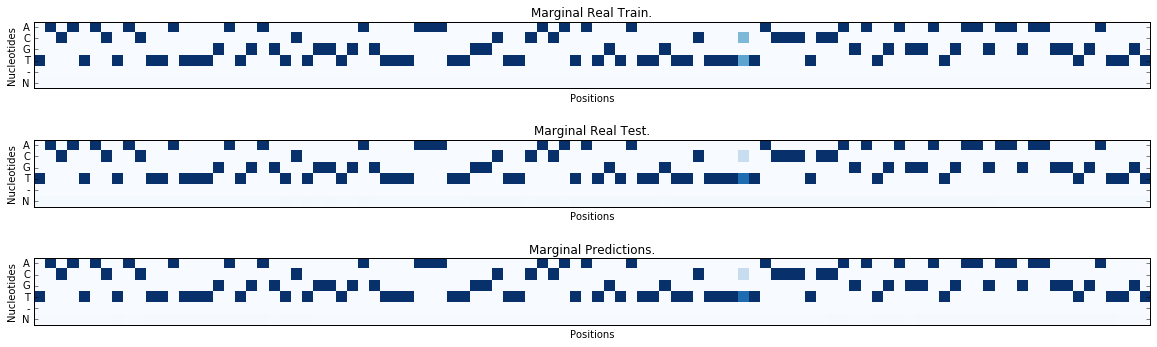

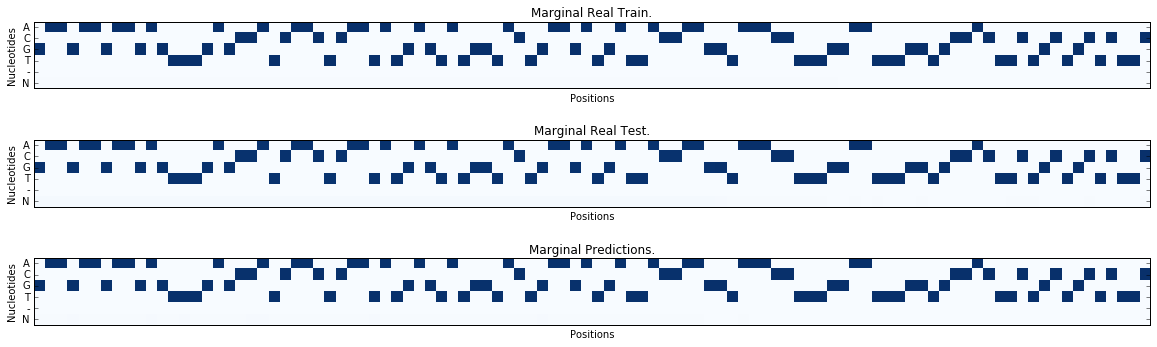

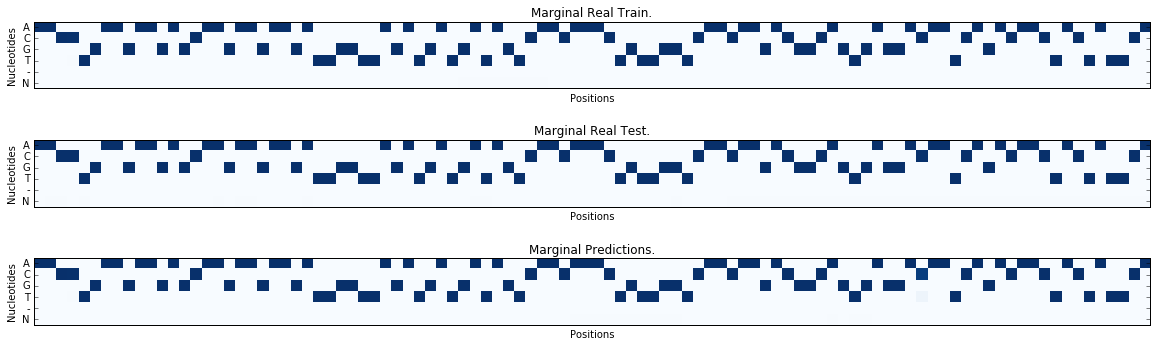

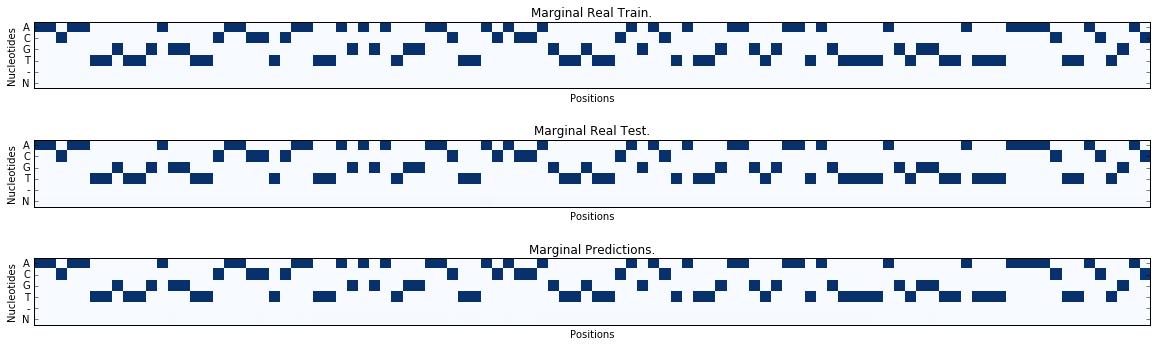

In [139]:
start_pos = 2800

for start_pos in [2800,2900,3000,3100]:
    plt.figure(figsize=(20,6))
    plt.subplot(311)
    plt.imshow(marg_real_train[:,start_pos:start_pos+100], interpolation='nearest', cmap='Blues')
    plt.xticks([], [])
    plt.xlabel("Positions")
    plt.yticks(np.arange(len(y_ticks)), y_ticks)
    plt.ylabel("Nucleotides")
    plt.title("Marginal Real Train.")
    plt.subplot(312)
    plt.imshow(marg_real[:,start_pos:start_pos+100], interpolation='nearest', cmap='Blues')
    plt.xticks([], [])
    plt.xlabel("Positions")
    plt.yticks(np.arange(len(y_ticks)), y_ticks)
    plt.ylabel("Nucleotides")
    plt.title("Marginal Real Test.")
    plt.subplot(313)
    plt.imshow(marg_pred[:,start_pos:start_pos+100], interpolation='nearest', cmap='Blues')
    plt.xticks([], [])
    plt.xlabel("Positions")
    plt.yticks(np.arange(len(y_ticks)), y_ticks)
    plt.ylabel("Nucleotides")
    plt.title("Marginal Predictions.")
    plt.show()